# ASTU Assignment

## BY-
### Ujjal Das - (170110007010)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATASET loading

In [2]:
data = pd.read_csv("PCA_practice_dataset.csv",header=None)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.031250,0.236364,0.238095,-0.090909,0.000000,0.381818,0.326316,-0.015625,-0.125000,0.553398,...,0.576923,0.471264,-0.033333,-0.046154,0.524752,0.410526,-0.015625,-0.187500,0.495146,0.515789
1,-0.031250,0.309091,0.380952,0.074380,0.129032,0.472727,0.557895,0.078125,-0.031250,0.398058,...,0.519231,0.425287,0.000000,0.138462,0.663366,0.368421,0.015625,0.125000,0.533981,0.368421
2,-0.031250,0.381818,0.261905,-0.107438,0.000000,0.527273,0.326316,0.046875,-0.031250,0.631068,...,0.384615,0.103448,-0.250000,-0.138462,0.425743,0.263158,-0.109375,-0.031250,0.650485,0.452632
3,-0.031250,0.381818,0.285714,-0.123967,-0.129032,0.309091,0.073684,-0.156250,0.093750,0.398058,...,0.519231,0.425287,-0.050000,-0.107692,0.485149,0.368421,-0.031250,-0.250000,0.203883,0.094737
4,-0.031250,0.381818,0.357143,-0.024793,-0.096774,0.454545,0.431579,-0.015625,-0.250000,0.398058,...,0.480769,0.471264,-0.033333,-0.169231,0.524752,0.515789,-0.015625,-0.281250,0.495146,0.410526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037,0.088958,0.016323,-0.213069,-0.376970,0.117490,0.074181,-0.182175,-0.286841,0.213958,0.240733,...,-0.120300,-0.329808,-0.370927,-0.015385,0.135798,-0.234572,-0.281250,0.093750,0.058469,-0.158971
8038,-0.243556,-0.092159,-0.477827,-0.536054,-0.094557,-0.092159,-0.411973,-0.498926,-0.122852,-0.027792,...,0.077584,-0.261208,-0.527032,-0.012212,0.188800,-0.260264,-0.405176,-0.032324,0.009709,-0.263158
8039,-0.136975,-0.068480,-0.466067,-0.504132,-0.006181,-0.054545,-0.233154,-0.409244,-0.061188,-0.067961,...,-0.168585,-0.566658,-0.532634,-0.279224,-0.223097,-0.539991,-0.534244,-0.181512,-0.053079,-0.416328
8040,-0.163077,-0.090909,-0.476190,-0.517050,-0.096774,-0.090909,-0.359223,-0.437500,-0.250000,-0.029126,...,0.130414,-0.292378,-0.450000,-0.052876,0.029703,-0.288810,-0.406250,-0.031250,0.087379,-0.263158


### Covariance matrix of data

In [4]:
cov = np.cov(data)

In [5]:
cov.shape

(8042, 8042)

### Eigenvalues and Eigenvectors of covariance matrix

In [6]:
e_val,e_vec = np.linalg.eig(cov)

In [7]:
e_val.shape

(8042,)

In [8]:
eig_vec_ls = []
for i in range(e_vec.shape[1]):
    e = np.matrix(data).T@e_vec[:,i]
    e = e/e_val[i]
    eig_vec_ls.append(np.ravel(e))

## Principal Components

In [46]:
sort_index = np.argsort(e_val)
t_val = np.arange(0.9,0.98,0.01)
t_val = t_val.round(2)
sort_index = sort_index[::-1]
e_val_sum = np.sum(e_val)
temp_sum=0
prin_e_val=[]
prin_e_vec=[]
t=0.9
i=0
prin_comp=[]
while t<0.98:
    while temp_sum<t*e_val_sum :
        prin_e_val.append(e_val[sort_index[i]])
        prin_e_vec.append(eig_vec_ls[sort_index[i]])
        temp_sum += e_val[sort_index[i]]
        i += 1
    prin_comp.append(i)
    t+=0.01

In [47]:
prin_comp

[4, 5, 5, 6, 6, 7, 7, 9]

In [49]:
for i in range(len(t_val)):
    print("Number of principal components at threshold {} is {}".format(t_val[i],prin_comp[i]))

Number of principal components at threshold 0.9 is 4
Number of principal components at threshold 0.91 is 5
Number of principal components at threshold 0.92 is 5
Number of principal components at threshold 0.93 is 6
Number of principal components at threshold 0.94 is 6
Number of principal components at threshold 0.95 is 7
Number of principal components at threshold 0.96 is 7
Number of principal components at threshold 0.97 is 9


# Scree Plot

Plotting number of principal components against threshold values

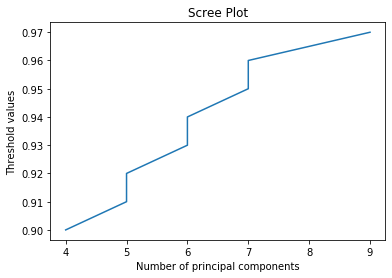

In [37]:
plt.plot(prin_comp,t_val)
plt.title("Scree Plot")
plt.xlabel("Number of principal components")
plt.ylabel("Threshold values")
plt.show()